<a href="https://colab.research.google.com/github/shalakagangadhare/AIRbnb-set/blob/main/Airbnb_intership_project_self_accomplished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Story**


Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

The data contains 48895 rows and 16 columns.

The data contains information about the id, host name, host_id, host_name, neighbourhood_group, neighbouhood, latitude, longitude, room type, price, minimum number of nights, number of reviews, last review, reviews per month, calculated host listings count, and availability during the year.

1. id: Unique ID of the Airbnb listing.

2. name: Name of the listed property.
3. host_id: Unique ID of the host.
4. host_name: Name of the host.
5. neighbourhood_group: General region of the location (neighborhood), e.g., Brooklyn, Manhattan, Queens, Staten Island, and Bronx.
6. neighbourhood: Specific neighborhood where the property is located.
7. latitude: Latitude coordinate of the property.
8. longitude: Longitude coordinate of the property.
9. room_type: Type of room (e.g., Private room, Shared room, Entire home/apt).
10. price: Price per night (in USD).
11. minimum_nights: Minimum number of nights guests are required to stay.
12. number_of_reviews: Number of reviews the listing has received.
13. last_review: Date of the last review.
14. reviews_per_month: Average number of reviews per month.
15. calculated_host_listings_count: Total number of properties listed by the host.
16. availability_365: Number of days the property is available in a year.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import time
import warnings
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from sklearn.exceptions import ConvergenceWarning

In [ ]:
df=pd.read_csv('/content/AB_NYC_2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
drop_list  = ['id', 'host_id', 'host_name','last_review']

In [ ]:
df.drop(drop_list, axis=1, inplace=True)

In [ ]:
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
# from ydata_profiling import ProfileReport
# df.profile_report()

Geographical Locations


In [ ]:
Long=-73.80
Lat=40.80

locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)

FastMarkerCluster(data=locations).add_to(map1)

map1

In [ ]:
df_filtered = df[['latitude', 'longitude', 'price']].dropna()
df_filtered = df_filtered[df_filtered['price'] > 0]
df_filtered['price'] = df_filtered['price'].clip(upper=df_filtered['price'].quantile(0.95))
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
heat_data = df_filtered[['latitude', 'longitude', 'price']]
HeatMap(heat_data, radius=10, max_zoom=13).add_to(nyc_map)
nyc_map

In [ ]:
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
# df.fillna({'reviews_per_month':0}, inplace=True)

In [ ]:
dff = df[["reviews_per_month"]]
dff.head()

,reviews_per_month
0,0.21
1,0.38
2,NaN
3,4.64
4,0.10


In [ ]:
# RobustScaler performs scaling based on the median and interquartile range (IQR).
# More resistant to outliers than StandardScaler or MinMaxScaler.
rs = RobustScaler()
dff = pd.DataFrame(rs.fit_transform(dff), columns=dff.columns)
dff.head()

,reviews_per_month
0,-0.278689
1,-0.185792
2,NaN
3,2.142077
4,-0.338798


In [ ]:
# Filling NaN using KNN
dff = pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(dff), columns = dff.columns)
dff.head()

,reviews_per_month
0,-0.278689
1,-0.185792
2,0.356952
3,2.142077
4,-0.338798


In [ ]:
dff = pd.DataFrame(rs.inverse_transform(dff), columns=dff.columns)
df[["reviews_per_month"]] = dff
df.head(10)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
5,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.590000,1,129
6,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.400000,1,0
7,Large Furnished Room Near B'way,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.470000,1,220
8,Cozy Clean Guest Room - Family Apt,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.990000,1,0
9,Cute & Cozy Lower East Side 1 bdrm,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.330000,4,188


In [ ]:
df.isnull().sum()

,0
name,16
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,0


In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 48895
Variables: 12
cat_cols: 2
num_cols: 8
cat_but_car: 2
num_but_cat: 0


In [ ]:
cat_cols

['neighbourhood_group', 'room_type']

In [ ]:
num_cols

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
cat_but_car

['name', 'neighbourhood']

In [ ]:
num_but_cat

[]

Brooklyn and Manhattan have the highest concentration of listings. Queens has a moderate density, while Bronx and Staten Island have fewer listings.

Most listings are entire homes/apartments, followed by private rooms. Shared rooms have the lowest prices.

                     neighbourhood_group      Ratio
neighbourhood_group                                
Manhattan                          21661  44.301053
Brooklyn                           20104  41.116679
Queens                              5666  11.588097
Bronx                               1091   2.231312
Staten Island                        373   0.762859


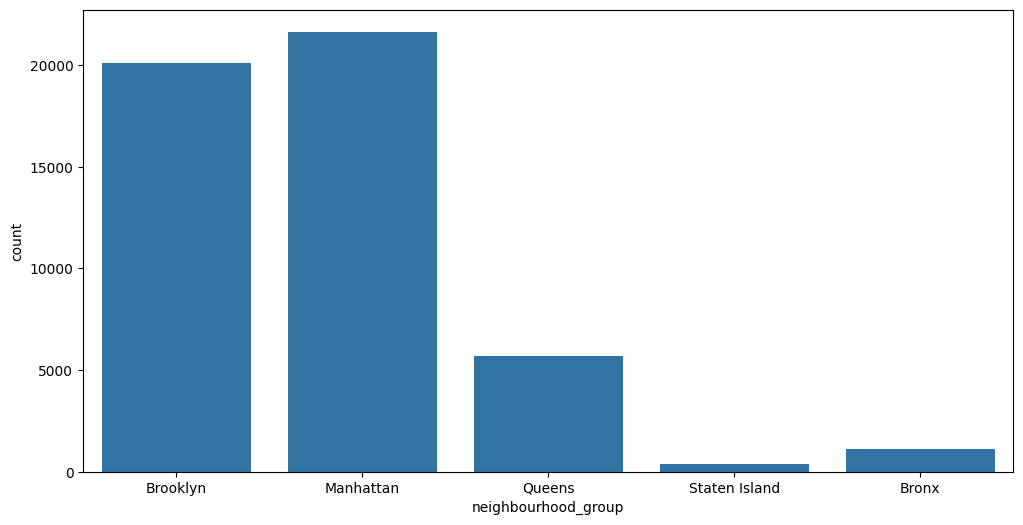

                 room_type      Ratio
room_type                            
Entire home/apt      25409  51.966459
Private room         22326  45.661111
Shared room           1160   2.372431


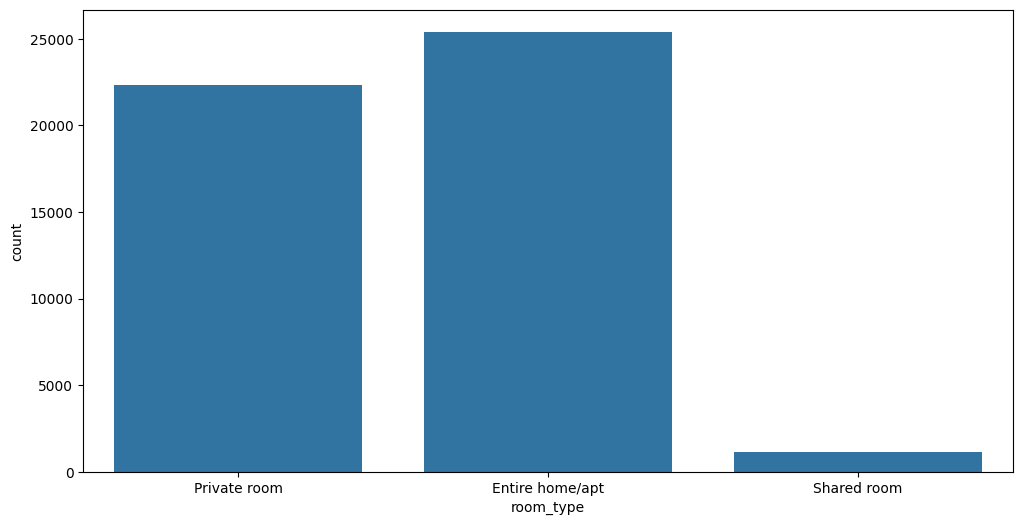

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.25, 0.50, 0.75, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

In [ ]:
# for col in num_cols:
#     num_summary(df, col, plot=True)

Manhattan dominates pricing due to its premium location. Bronx and Queens are more affordable, Brooklyn and Staten Island are mid-range.

Entire home/apartment listings are the most expensive. Private rooms have an average price, and Shared rooms are the cheapest.

In [ ]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe)
        plt.show(block=True)

                     TARGET_MEAN
neighbourhood_group             
Bronx                  87.496792
Brooklyn              124.383207
Manhattan             196.875814
Queens                 99.517649
Staten Island         114.812332




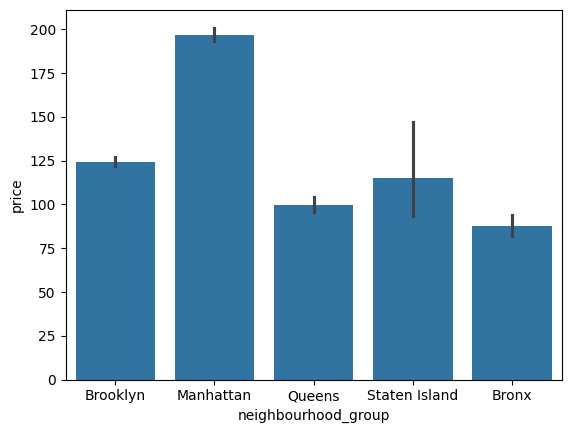

                 TARGET_MEAN
room_type                   
Entire home/apt   211.794246
Private room       89.780973
Shared room        70.127586




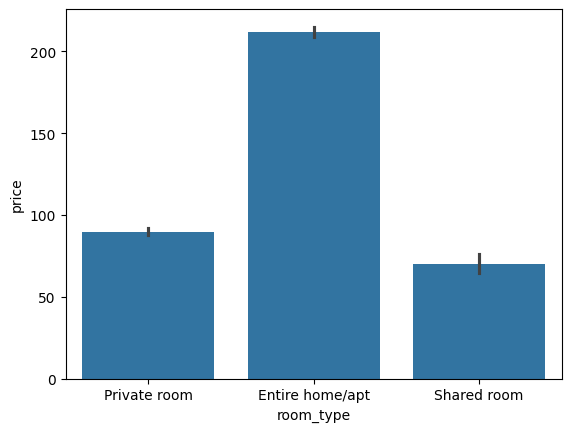

In [ ]:
for col in cat_cols:
    target_summary_with_cat(df, 'price', col, plot=True)

In [ ]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

In [ ]:
for col in num_cols:
    target_summary_with_cat(df, 'price', col, plot=False)

          TARGET_MEAN
latitude             
40.49979        110.0
40.50641         75.0
40.50708        100.0
40.50868        299.0
40.50873         85.0
...               ...
40.90804         53.0
40.91167         40.0
40.91169         50.0
40.91234         40.0
40.91306         40.0

[19048 rows x 1 columns]


           TARGET_MEAN
longitude             
-74.24442         70.0
-74.24285        100.0
-74.24084        110.0
-74.23986        299.0
-74.23914         85.0
...                ...
-73.71928         32.0
-73.71829        180.0
-73.71795         42.0
-73.71690        240.0
-73.71299         65.0

[14718 rows x 1 columns]


       TARGET_MEAN
price             
0              0.0
10            10.0
11            11.0
12            12.0
13            13.0
...            ...
7703        7703.0
8000        8000.0
8500        8500.0
9999        9999.0
10000      10000.0

[674 rows x 1 columns]


                TARGET_MEAN
minimum_nights             
1                142.022877
2 

Correlation Analysis

Listings with higher availability tend to be booked more often.

More frequent bookings lead to more reviews.

Listings with more bookings generate higher minimum income.

Longer stays (minimum_nights) correlate with more total booked days


In [ ]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (12, 12)})
        sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")
        plt.show()
    return drop_list

In [ ]:
corr = df[num_cols].corr()
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.009115,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.131599,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.022373,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.091942,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.530093,-0.072376,0.172028
reviews_per_month,-0.009115,0.131599,-0.022373,-0.091942,0.530093,1.000000,-0.006701,0.162980
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.006701,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.162980,0.225701,1.000000


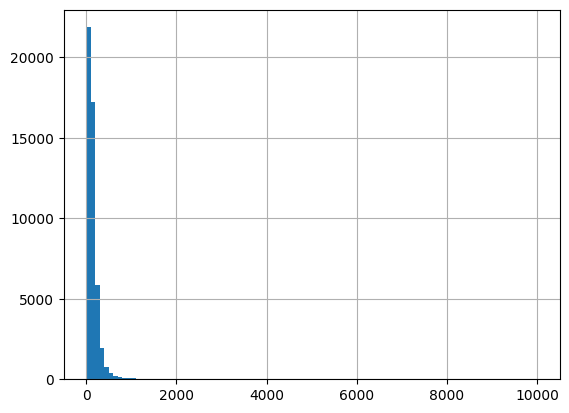

In [ ]:
df["price"].hist(bins=100)
plt.show(block=True)

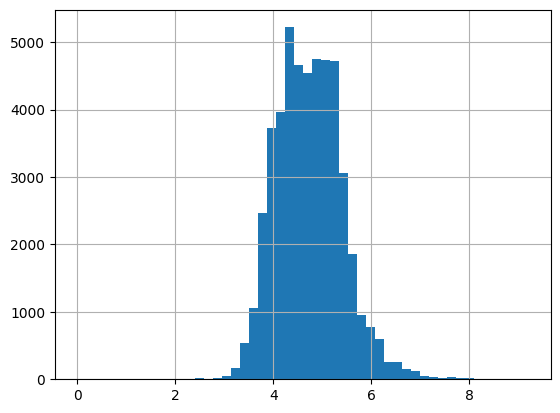

In [ ]:
np.log1p(df['price']).hist(bins=50)
plt.show(block=True)

Visualizing Location Data Based on Neighbourhood Group and Room Type

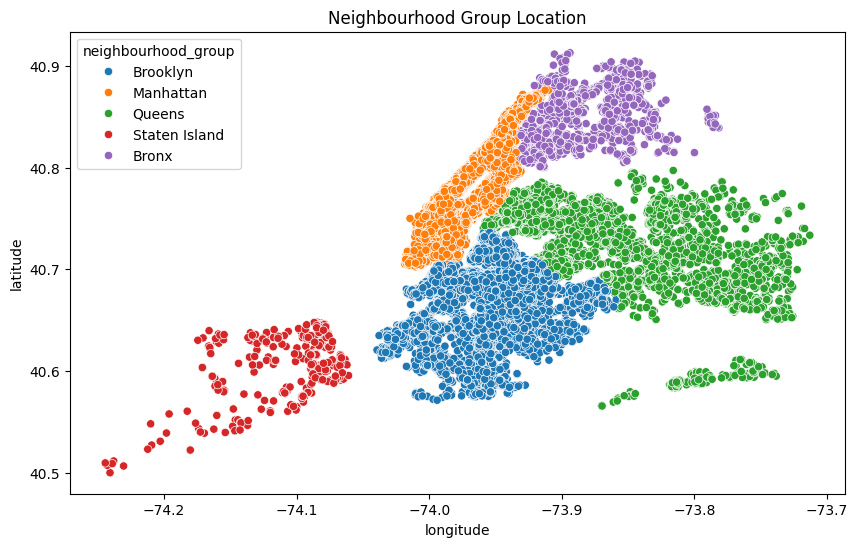

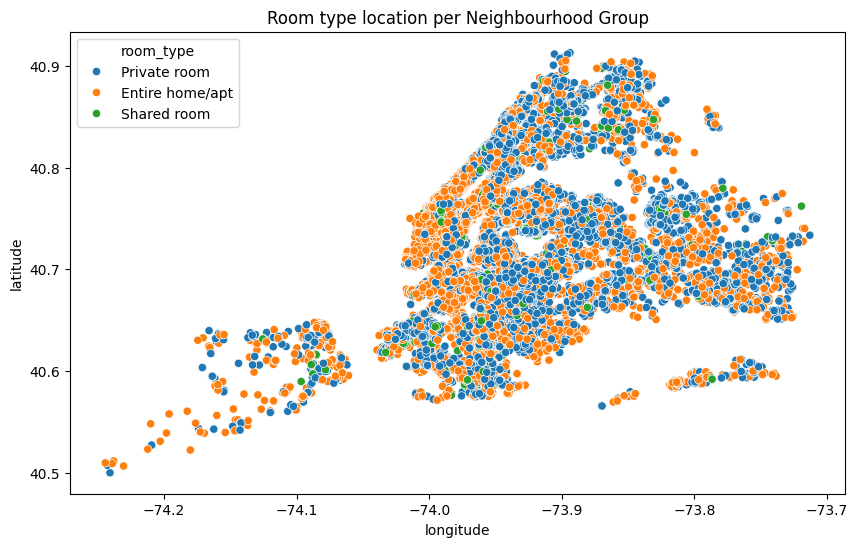

In [ ]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df).set_title(title)
plt.ioff()

title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=df).set_title(title)
plt.ioff()

Price Distribution by Room Type in Neighbourhood Groups
Entire home/apartment listings dominate Manhattan. Private rooms are more widespread across all areas. Shared rooms are less common.

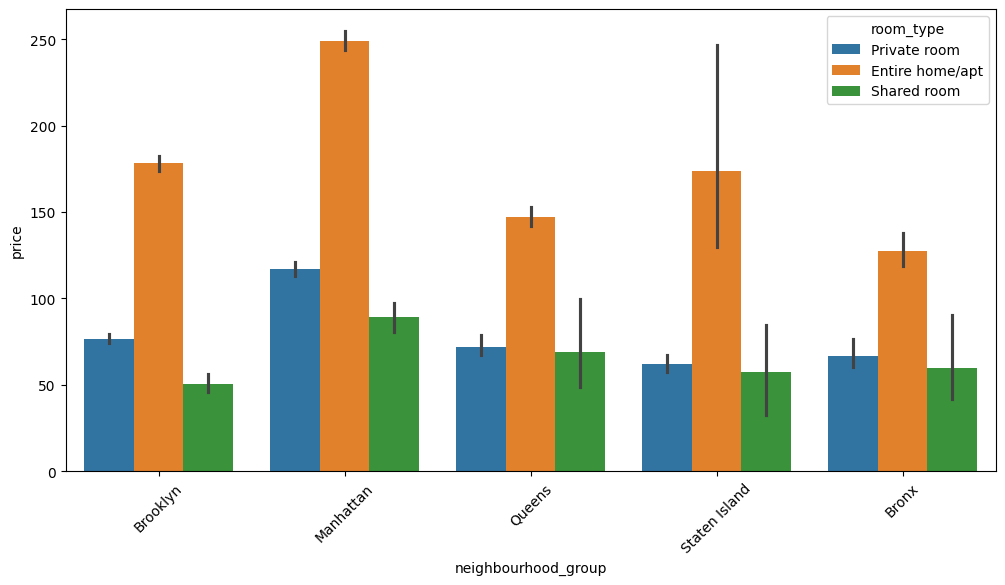

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()

Comparative Display of Median Monthly Reviews by Neighbourhood Group
Bronx, Queens, and Staten Island have the highest median reviews per month (~1.75).

Brooklyn and Manhattan have lower review rates (~1.25).

<ipython-input-40-49b0f0344ac0>:2: FutureWarning: The provided callable <function median at 0x7dfb4e702a20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = df.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')


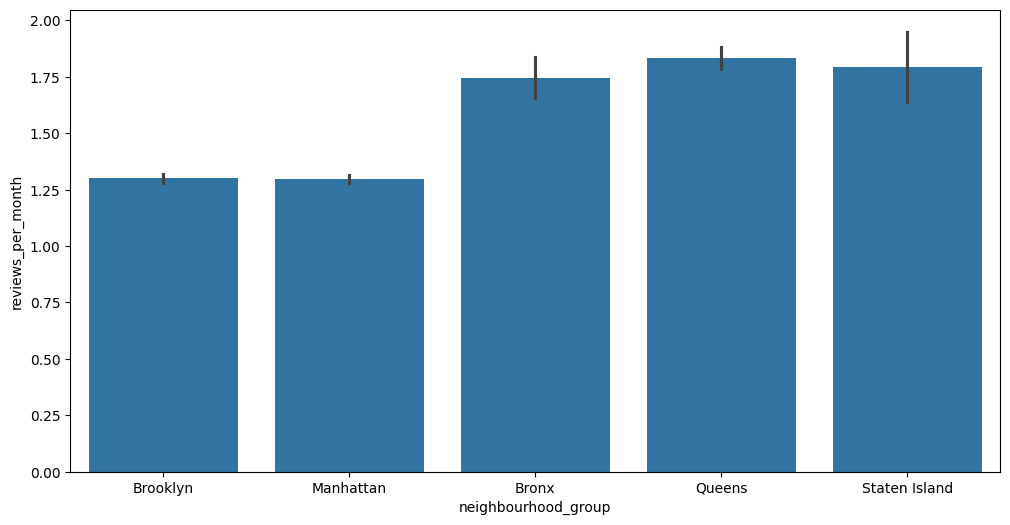

In [ ]:
plt.figure(figsize=(12,6))
result = df.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df, order=result['neighbourhood_group'])
plt.show()

Comparison of Minimum Stay Nights by Neighbourhood Group

Manhattan has the highest median minimum stay (~6-7 nights).

Brooklyn, Queens, and Staten Island have moderate minimum stays (~4-5 nights).

Bronx has the lowest minimum stay (~3 nights).

<ipython-input-41-47e3a5cbf32f>:2: FutureWarning: The provided callable <function median at 0x7dfb4e702a20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = df.groupby(["neighbourhood_group"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')


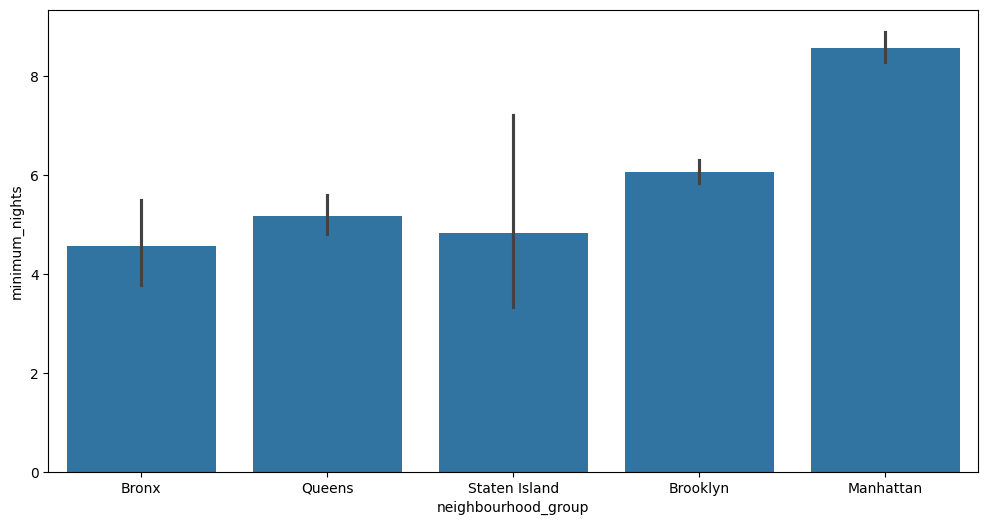

In [ ]:
plt.figure(figsize=(12,6))
result = df.groupby(["neighbourhood_group"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x='neighbourhood_group', y="minimum_nights", data=df, order=result['neighbourhood_group'])
plt.show()

Comparison of Number of Reviews by Neighbourhood Group
Queens has the highest median number of reviews (~30).

Brooklyn, Bronx, and Staten Island follow with ~25 reviews on average.

Manhattan has the lowest median number of reviews (~22-23) possibly due to higher prices and shorter stays.

<ipython-input-42-676529c5499d>:2: FutureWarning: The provided callable <function median at 0x7dfb4e702a20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = df.groupby(["neighbourhood_group"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')


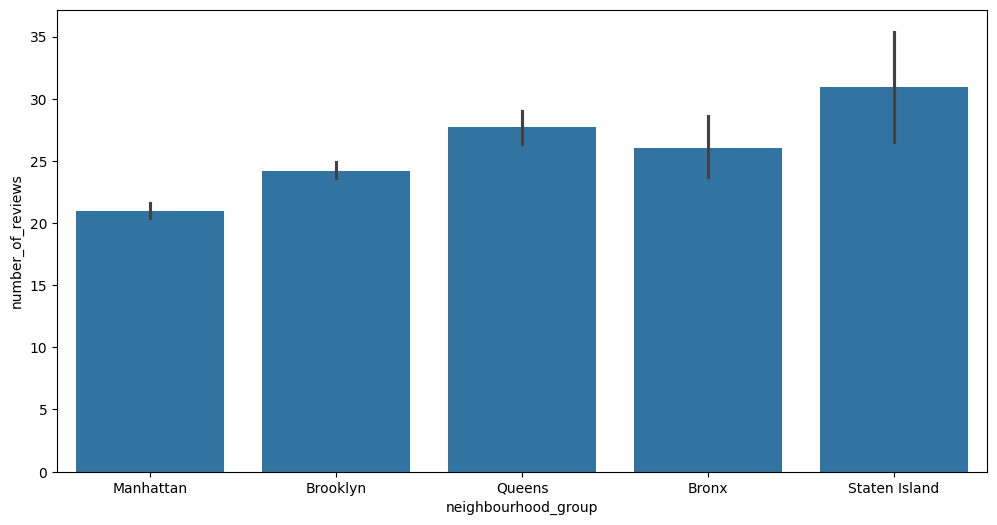

In [ ]:
plt.figure(figsize=(12,6))
result = df.groupby(["neighbourhood_group"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x='neighbourhood_group', y="number_of_reviews", data=df, order=result['neighbourhood_group'])
plt.show()

Comparison of Host Listing Counts by Neighbourhood Group
Manhattan hosts tend to have the highest number of listings per host (~12).

Other boroughs (Bronx, Brooklyn, Queens, Staten Island) have much fewer (~2-4 listings per host)

<ipython-input-43-504d34e63292>:2: FutureWarning: The provided callable <function median at 0x7dfb4e702a20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = df.groupby(["neighbourhood_group"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')


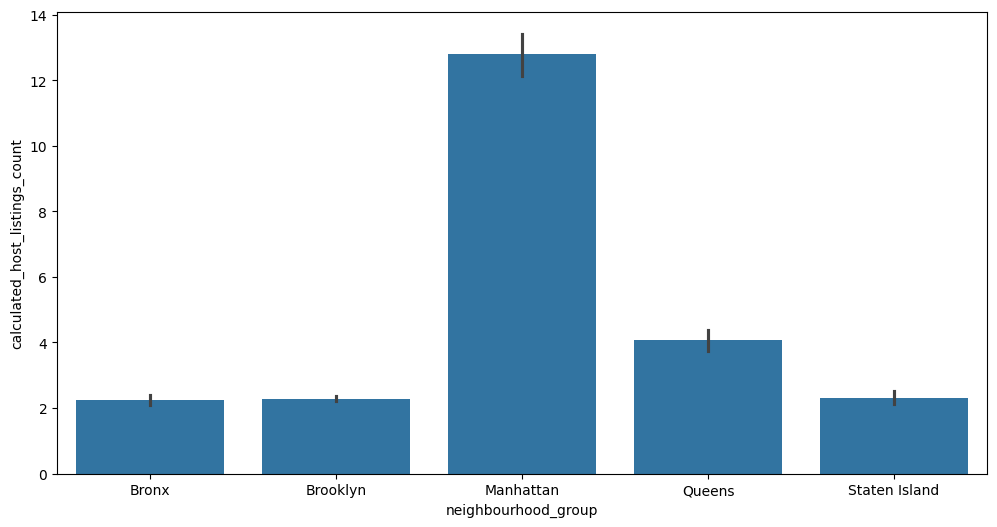

In [ ]:
plt.figure(figsize=(12,6))
result = df.groupby(["neighbourhood_group"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='neighbourhood_group', y="calculated_host_listings_count", data=df, order=result['neighbourhood_group'])
plt.show()

Comparison of Yearly Availability by Neighbourhood Group
Staten Island has the highest availability (close to 200 days per year).

Bronx and Queens also have high availability, while Brooklyn and Manhattan have lower availability (closer to 125-150 days).

<ipython-input-44-f354e2ea6cfc>:2: FutureWarning: The provided callable <function median at 0x7dfb4e702a20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = df.groupby(["neighbourhood_group"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')


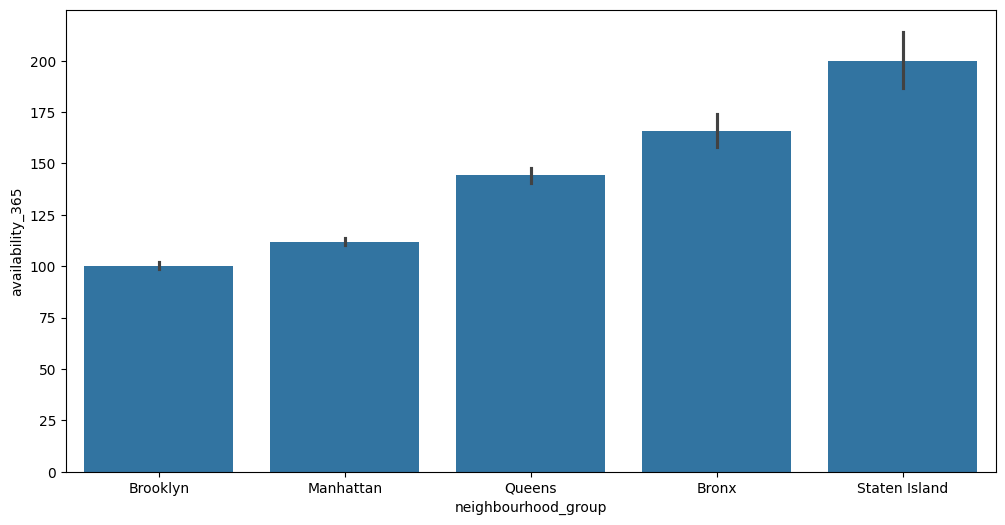

In [ ]:
plt.figure(figsize=(12,6))
result = df.groupby(["neighbourhood_group"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')
sns.barplot(x='neighbourhood_group', y="availability_365", data=df, order=result['neighbourhood_group'])
plt.show()

Comparison of Number of Reviews by Room Type

Private rooms and entire apartments have the most reviews (~22-24 median reviews).

Shared rooms have fewer reviews (~15-18 median reviews)

<ipython-input-45-74a0f7acae21>:2: FutureWarning: The provided callable <function median at 0x7dfb4e702a20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = df.groupby(["room_type"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')


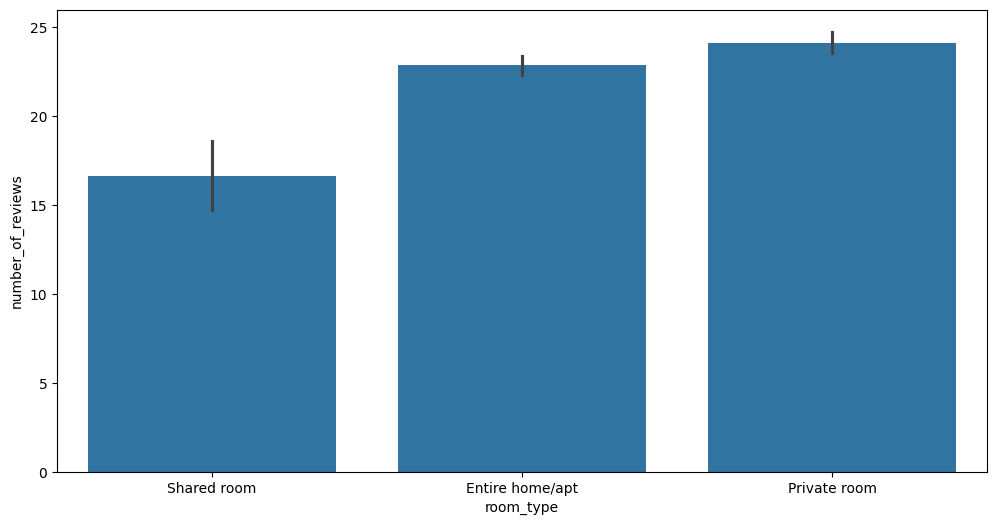

In [ ]:
plt.figure(figsize=(12,6))
result = df.groupby(["room_type"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x='room_type', y="number_of_reviews", data=df, order=result['room_type'])
plt.show()

Comparison of Monthly Reviews by Room Type

<ipython-input-46-698ea650d5c8>:2: FutureWarning: The provided callable <function median at 0x7dfb4e702a20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = df.groupby(["room_type"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')


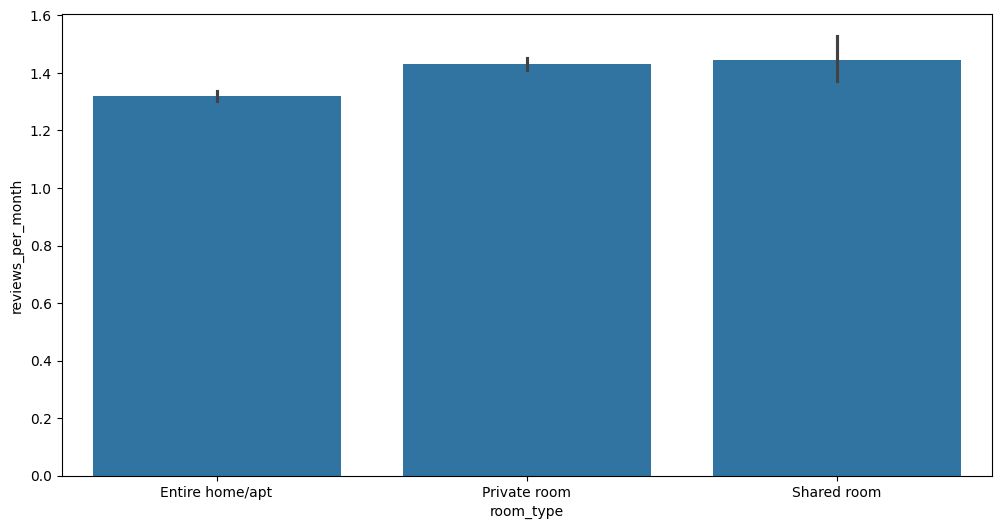

In [ ]:
plt.figure(figsize=(12,6))
result = df.groupby(["room_type"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='room_type', y="reviews_per_month", data=df, order=result['room_type'])
plt.show()

Comparison of Host Listing Counts by Room Type
Entire home/apartments have the highest number of listings per host (~10).

Shared and private rooms have significantly fewer listings per host

<ipython-input-47-b9d0dc97ca08>:2: FutureWarning: The provided callable <function median at 0x7dfb4e702a20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = df.groupby(["room_type"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')


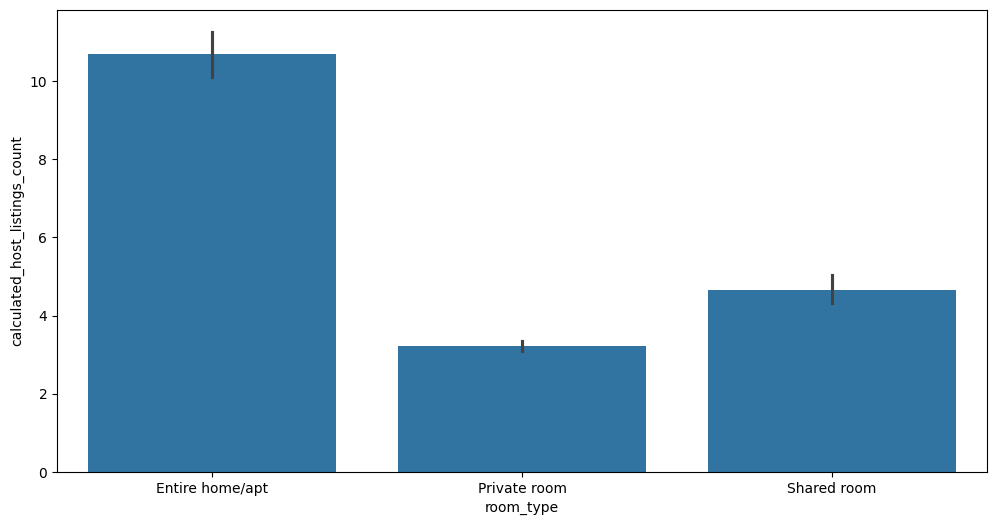

In [ ]:
plt.figure(figsize=(12,6))
result = df.groupby(["room_type"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='room_type', y="calculated_host_listings_count", data=df, order=result['room_type'])
plt.show()

Comparison of Yearly Availability by Room Type
Shared rooms tend to be available for longer durations. Entire homes and private rooms may have more seasonal availabilit

<ipython-input-48-1bd09b489fc5>:2: FutureWarning: The provided callable <function median at 0x7dfb4e702a20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = df.groupby(["room_type"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')


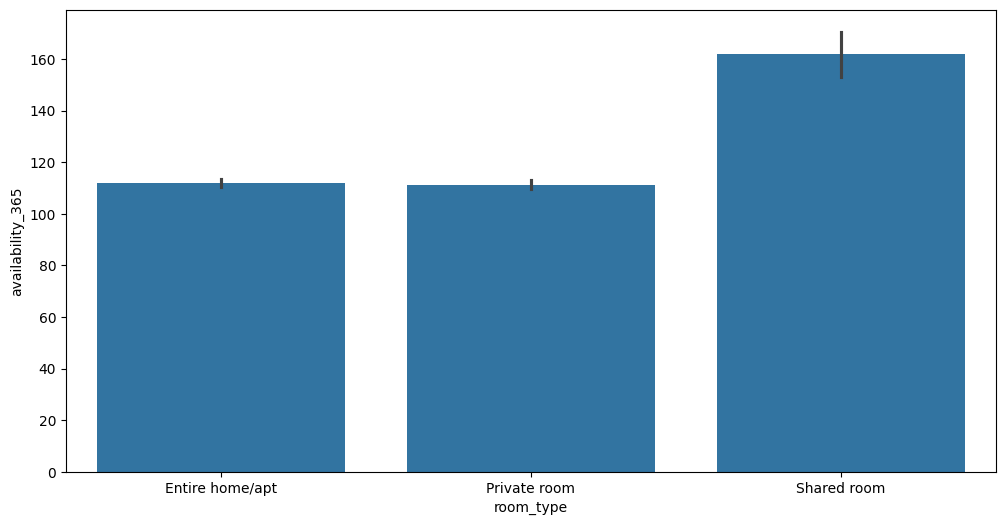

In [ ]:
plt.figure(figsize=(12,6))
result = df.groupby(["room_type"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')
sns.barplot(x='room_type', y="availability_365", data=df, order=result['room_type'])
plt.show()

Outliers Analysis

In [ ]:
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [ ]:
drop_list_2 = ['name','neighbourhood']
df.drop(drop_list_2, axis=1, inplace=True)
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [ ]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df

In [ ]:
rare_encoder(df, 0.01)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,1.373221,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,1.373221,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,1.373221,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,1.373221,6,2


In [ ]:
df['NEW_total_cost'] = df['price'] * df['minimum_nights']
df['NEW_estimated_listed_months'] = df['number_of_reviews'] / df['reviews_per_month']
df['NEW_availability_ratio'] = df['availability_365'] / 365
df['NEW_daily_average_reviews'] = df['reviews_per_month'] / 30
df['NEW_annual_income'] = df['price'] * df['availability_365']
df['NEW_average_stay_duration'] = df['number_of_reviews'] / df['reviews_per_month']
df['NEW_days_booked'] = 365 - df['availability_365']
df['NEW_minimum_income'] = df['price'] * df['minimum_nights']

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  NEW_total_cost                  48895 non-null  int64  
 11  NEW_estimated_listed_months     48895 non-null  float64
 12  NEW_availability_ratio          

# cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
df = one_hot_encoder(df, cat_cols, drop_first=True)
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,NEW_total_cost,NEW_estimated_listed_months,...,NEW_annual_income,NEW_average_stay_duration,NEW_days_booked,NEW_minimum_income,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.210000,6,365,149,42.857143,...,54385,42.857143,0,149,True,False,False,False,True,False
1,40.75362,-73.98377,225,1,45,0.380000,2,355,225,118.421053,...,79875,118.421053,10,225,False,True,False,False,False,False
2,40.80902,-73.94190,150,3,0,1.373221,1,365,450,0.000000,...,54750,0.000000,0,450,False,True,False,False,True,False
3,40.68514,-73.95976,89,1,270,4.640000,1,194,89,58.189655,...,17266,58.189655,171,89,True,False,False,False,False,False
4,40.79851,-73.94399,80,10,9,0.100000,1,0,800,90.000000,...,0,90.000000,365,800,False,True,False,False,False,False


In [ ]:
num_cols = [col for col in num_cols if col not in ["price"]]
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '')
df.columns = df.columns.str.lower()
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,new_total_cost,new_estimated_listed_months,...,new_annual_income,new_average_stay_duration,new_days_booked,new_minimum_income,neighbourhood_group_brooklyn,neighbourhood_group_manhattan,neighbourhood_group_queens,neighbourhood_group_staten_island,room_type_private_room,room_type_shared_room
0,-1.035130,-0.356662,149,-0.50,0.173913,-0.776923,5.0,1.409692,149,42.857143,...,54385,42.857143,0,149,True,False,False,False,True,False
1,0.418407,-0.600278,225,-0.50,1.739130,-0.646154,1.0,1.365639,225,118.421053,...,79875,118.421053,10,225,False,True,False,False,False,False
2,1.177155,0.294476,150,0.00,-0.217391,0.117863,0.0,1.409692,450,0.000000,...,54750,0.000000,0,450,False,True,False,False,True,False
3,-0.519482,-0.087189,89,-0.50,11.521739,2.630769,0.0,0.656388,89,58.189655,...,17266,58.189655,171,89,True,False,False,False,False,False
4,1.033212,0.249813,80,1.75,0.173913,-0.861538,0.0,-0.198238,800,90.000000,...,0,90.000000,365,800,False,True,False,False,False,False


Creating Model


In [ ]:
y = df["price"]
X = df.drop(["price"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           48895 non-null  float64
 1   longitude                          48895 non-null  float64
 2   price                              48895 non-null  int64  
 3   minimum_nights                     48895 non-null  float64
 4   number_of_reviews                  48895 non-null  float64
 5   reviews_per_month                  48895 non-null  float64
 6   calculated_host_listings_count     48895 non-null  float64
 7   availability_365                   48895 non-null  float64
 8   new_total_cost                     48895 non-null  int64  
 9   new_estimated_listed_months        48895 non-null  float64
 10  new_availability_ratio             48895 non-null  float64
 11  new_daily_average_reviews          48895 non-null  flo

RMSE: 150.0074 (LR)
R^2 Score: 0.5444 (LR)
MAE: 48.2368 (LR)
Execution Time: 0.24 seconds

RMSE: 145.601 (KNN)
R^2 Score: 0.582 (KNN)
MAE: 42.0393 (KNN)
Execution Time: 15.43 seconds

RMSE: 74.1847 (CART)
R^2 Score: 0.9619 (CART)
MAE: 2.7348 (CART)
Execution Time: 4.76 seconds

RMSE: 70.5064 (RF)
R^2 Score: 0.9372 (RF)
MAE: 2.5461 (RF)
Execution Time: 322.47 seconds

RMSE: 65.4083 (GBM)
R^2 Score: 0.9203 (GBM)
MAE: 17.4413 (GBM)
Execution Time: 85.67 seconds

RMSE: 110.9039 (XGBoost)
R^2 Score: 0.8503 (XGBoost)
MAE: 6.1114 (XGBoost)
Execution Time: 4.49 seconds

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3370
[LightGBM] [Info] Number of data points in the train set: 39116, number of used features: 21
[LightGBM] [Info] Start training from score 153.483357
[LightGBM] [Info] Auto-

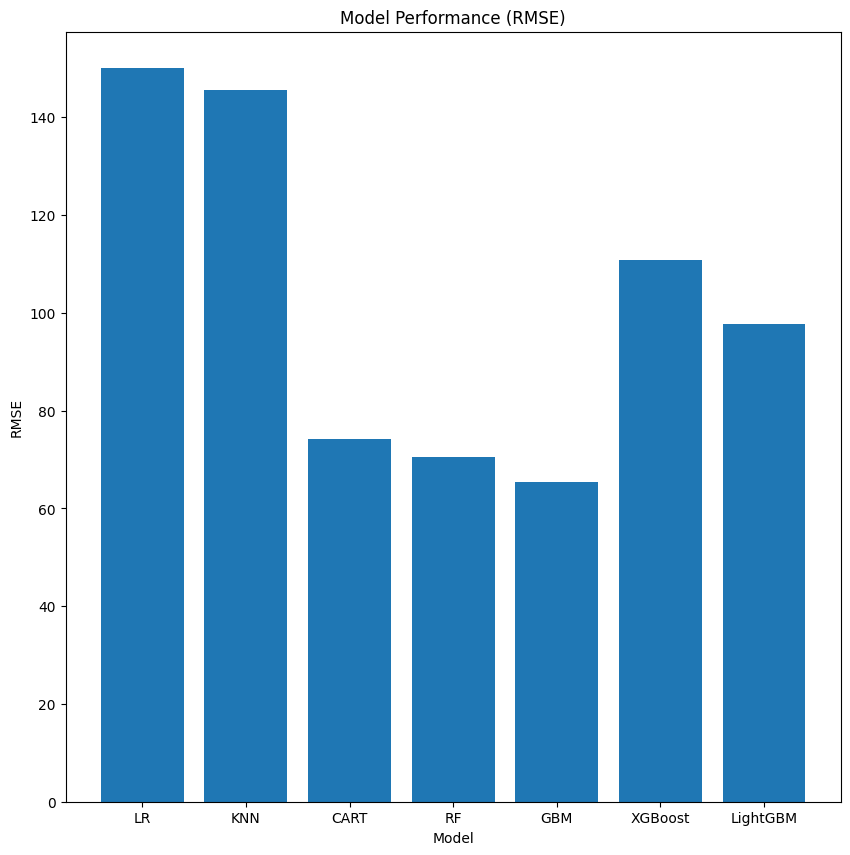

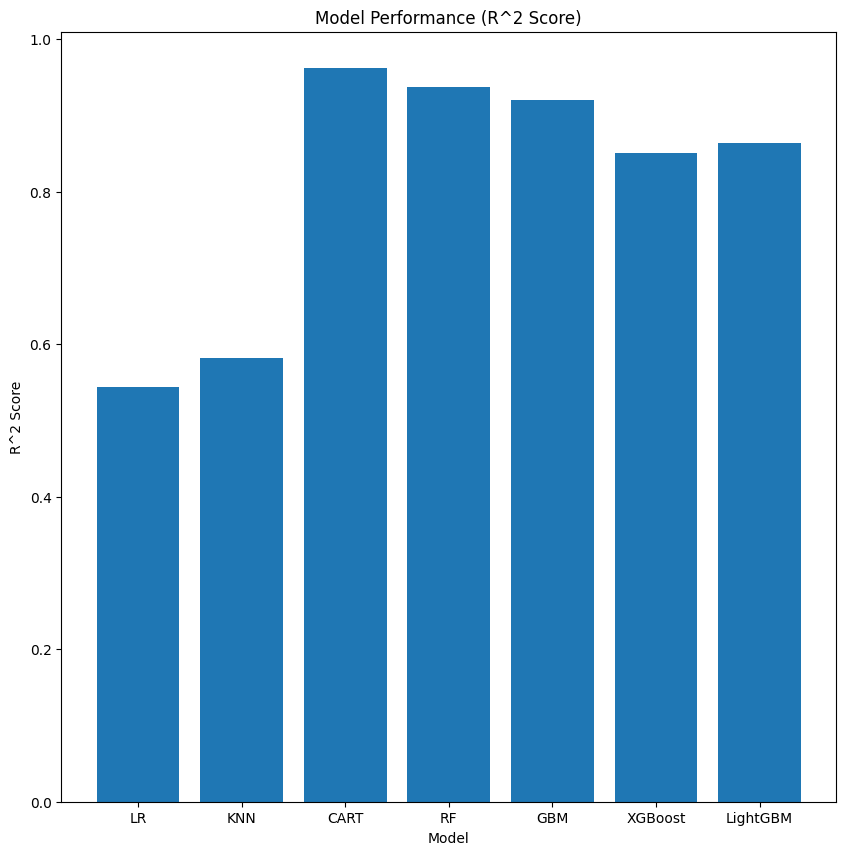

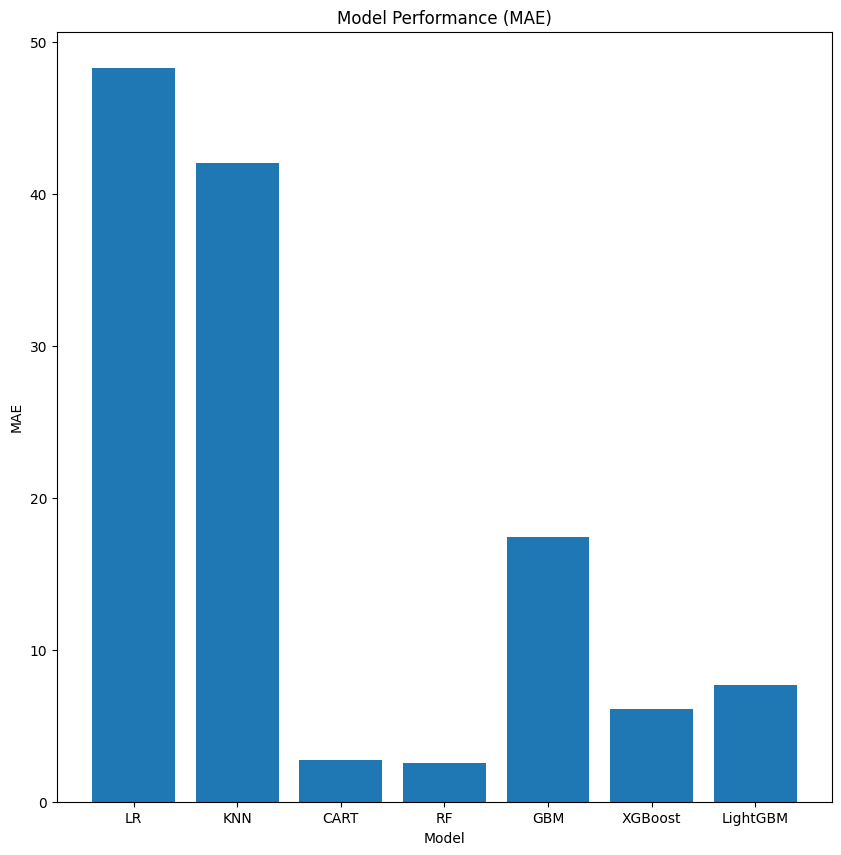

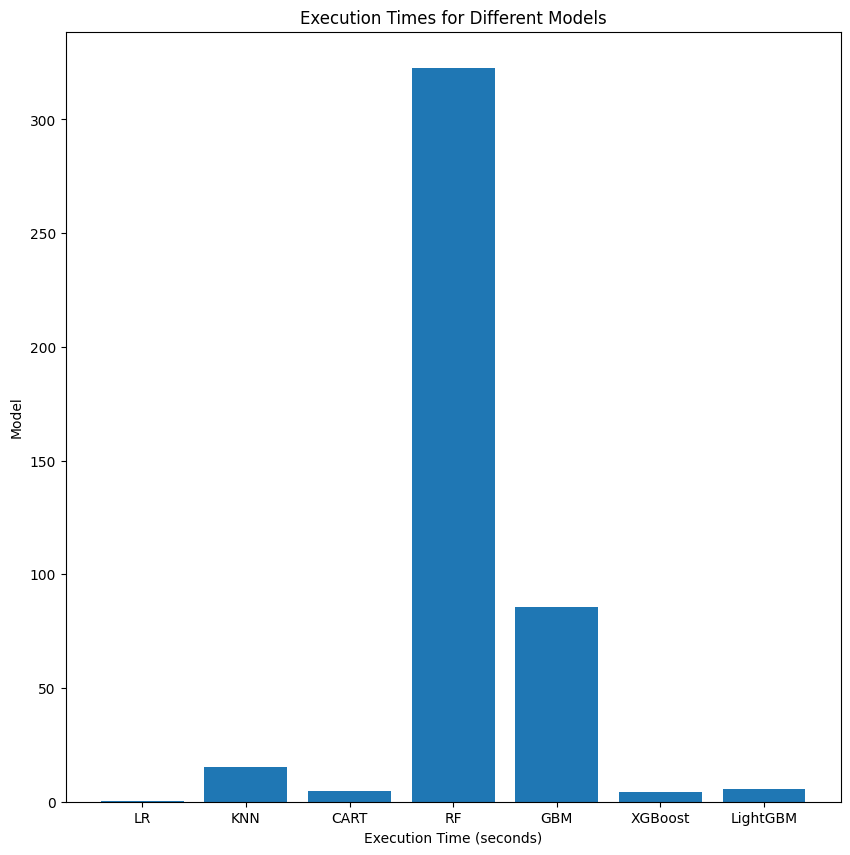

In [ ]:
models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]

rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []

for name, regressor in models:
    start_time = time.time()

    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)

    r2 = metrics.r2_score(y_test, y_pred)
    r2_scores.append(r2)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"R^2 Score: {round(r2, 4)} ({name})")
    print(f"MAE: {round(mae, 4)} ({name})")
    print(f"Execution Time: {round(execution_time, 2)} seconds\n")

plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in models], rmse_scores)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Performance (RMSE)")
plt.show()

plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in models], r2_scores)
plt.xlabel("Model")
plt.ylabel("R^2 Score")
plt.title("Model Performance (R^2 Score)")
plt.show()

plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in models], mae_scores)
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("Model Performance (MAE)")
plt.show()

plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in models], execution_times)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Model")
plt.title("Execution Times for Different Models")
plt.show()

Results of Final Model Prediction:
        Predicted Price  True Price  Difference
2472        136.947372         135   -1.947372
34556        98.757141         100    1.242859
34771        41.832439          39   -2.832439
48617        78.846756          80    1.153244
11574       150.696564         150   -0.696564
...                ...         ...         ...
24079       361.195862         375   13.804138
39454       118.926811         120    1.073189
12582       220.493988         220   -0.493988
10308       200.821350         200   -0.821350
6586         78.846756          80    1.153244

[9779 rows x 3 columns]


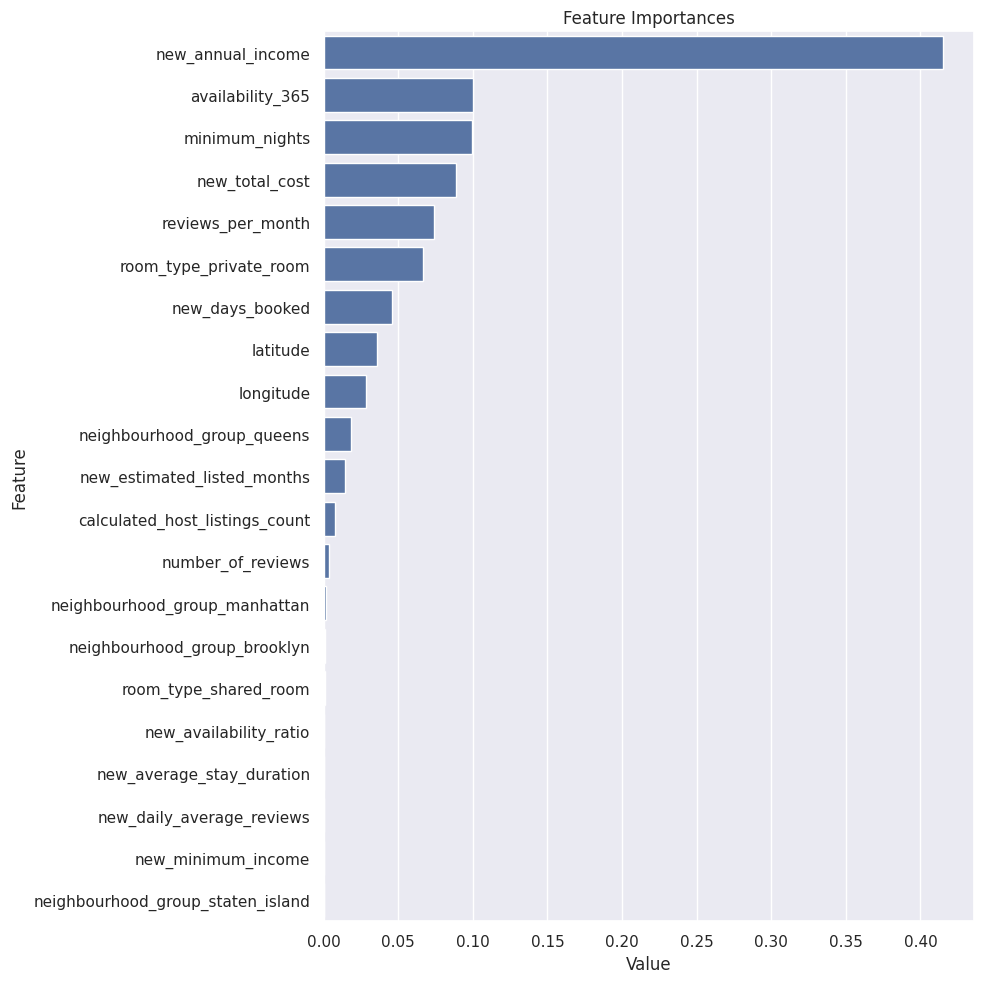

In [ ]:
final_model = XGBRegressor()
final_model.fit(X_train, y_train)
y_final_pred = final_model.predict(X_test)
final_y_pred = y_final_pred
final_y_test = y_test
results = pd.DataFrame({'Predicted Price': final_y_pred, 'True Price': final_y_test})
results['Difference'] = results['True Price'] - results['Predicted Price']
print("Results of Final Model Prediction:\n", results)
def plot_importance(model, features, num=50, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show(block=True)
plot_importance(final_model, X)